In [10]:
import keras
keras.__version__

'2.1.5'

### Data Preparation

In [11]:
import os, shutil

# defined directories of training set, validation set and test set
origin_train_dir = 'train'
origin_test_dir = 'test'
base_dir = 'base'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation_dir')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test_dir')
os.mkdir(test_dir)

# defined more specific directory with dog or cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# -------------------------------------------------
test_image_dir = os.path.join(test_dir, 'test')
os.mkdir(test_image_dir)

# Copy images to the above defined directories
filenames = ['cat.{}.jpg'.format(i) for i in range(10000)]
for filename in filenames:
    src = os.path.join(origin_train_dir, filename)
    dst = os.path.join(train_cats_dir, filename)
    shutil.copyfile(src, dst)
    
filenames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for filename in filenames:
    src = os.path.join(origin_train_dir, filename)
    dst = os.path.join(train_dogs_dir, filename)
    shutil.copyfile(src, dst)
    
filenames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for filename in filenames:
    src = os.path.join(origin_train_dir, filename)
    dst = os.path.join(validation_cats_dir, filename)
    shutil.copyfile(src, dst)
    
filenames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for filename in filenames:
    src = os.path.join(origin_train_dir, filename)
    dst = os.path.join(validation_dogs_dir, filename)
    shutil.copyfile(src, dst)

filenames = ['{}.jpg'.format(i) for i in range(1,12501)]
for filename in filenames:
    src = os.path.join(origin_test_dir, filename)
    dst = os.path.join(test_image_dir, filename)
    shutil.copyfile(src, dst)

FileExistsError: [Errno 17] File exists: 'base'

In [13]:
# Sanity check
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test images:', len(os.listdir(test_image_dir)))

total training cat images: 10000
total training dog images: 10000
total validation cat images: 2500
total validation dog images: 2500
total test images: 12500


### CNN Model
Design a basic model to guess result.

In [14]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [16]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [18]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [19]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='saved_models/cats_and_dogs_small_1.h5', 
                               verbose=1, save_best_only=True)


In [20]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=400,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/30
400/400 [==============================] - 533s 1s/step - loss: 0.6312 - acc: 0.6365 - val_loss: 0.5480 - val_acc: 0.7300
Epoch 2/30
400/400 [==============================] - 530s 1s/step - loss: 0.5323 - acc: 0.7311 - val_loss: 0.4872 - val_acc: 0.7692
Epoch 3/30
400/400 [==============================] - 529s 1s/step - loss: 0.4783 - acc: 0.7698 - val_loss: 0.4704 - val_acc: 0.7728
Epoch 4/30
400/400 [==============================] - 540s 1s/step - loss: 0.4384 - acc: 0.7940 - val_loss: 0.4305 - val_acc: 0.8034
Epoch 5/30
400/400 [==============================] - 541s 1s/step - loss: 0.4084 - acc: 0.8155 - val_loss: 0.4609 - val_acc: 0.7802
Epoch 6/30
400/400 [==============================] - 534s 1s/step - loss: 0.3839 - acc: 0.8274 - val_loss: 0.3995 - val_acc: 0.8246
Epoch 7/30
400/400 [==============================] - 534s 1s/step - loss: 0.3626 - acc: 0.8404 - val_loss: 0.3696 - val_acc: 0.8346
Epoch 8/30
400/400 [==============================] - 534s 1s/step - 

In [21]:
model.save('cats_vs_dogs_basic_1.h5')

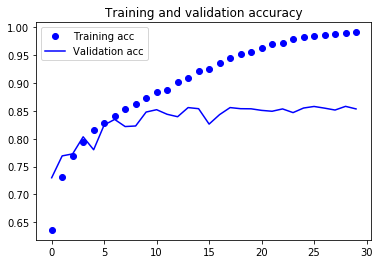

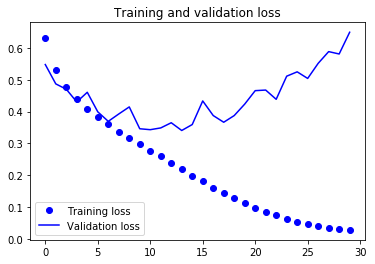

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The classification accuracy on the verification set is about 85%.

### Using data enhancement techniques
To overcome overfitting, we will also add a dropout layer in front of the full link layer classifier in our model:

In [25]:
from keras import backend as K
# to adjust for the backend (here tensorflow)
img_width= 150
img_height= 150

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [26]:
input_shape

(150, 150, 3)

In [27]:
model = models.Sequential()

# We use 32 features for our 2D array and set our array to be 3x3. 
# We will convert all of our images to be 150x150 into a 3D array (Since it is in color(RGB)).
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape= input_shape))

# Now we use pooling to reduce the size of the feature map taken from the convolution stage. (Divide by 2)
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Now we flatten our 2D pooled array into a vector.
model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

# Step 4 - Full connection
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=70,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=70,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [34]:
import datetime

starttime = datetime.datetime.now()

history = model.fit_generator(
      train_generator,
      steps_per_epoch=400,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=100)

endtime = datetime.datetime.now()

interval=(endtime - starttime).seconds
print("Time taken:"), interval

Epoch 1/100
400/400 [==============================] - 833s 2s/step - loss: 0.6622 - acc: 0.5918 - val_loss: 0.6015 - val_acc: 0.6695
Epoch 2/100
400/400 [==============================] - 781s 2s/step - loss: 0.6150 - acc: 0.6542 - val_loss: 0.5280 - val_acc: 0.7395
Epoch 3/100
400/400 [==============================] - 779s 2s/step - loss: 0.5820 - acc: 0.6897 - val_loss: 0.5087 - val_acc: 0.7573
Epoch 4/100
400/400 [==============================] - 780s 2s/step - loss: 0.5573 - acc: 0.7083 - val_loss: 0.5039 - val_acc: 0.7437
Epoch 5/100
400/400 [==============================] - 782s 2s/step - loss: 0.5441 - acc: 0.7211 - val_loss: 0.5009 - val_acc: 0.7524
Epoch 6/100
400/400 [==============================] - 795s 2s/step - loss: 0.5265 - acc: 0.7353 - val_loss: 0.4698 - val_acc: 0.7710
Epoch 7/100
400/400 [==============================] - 955s 2s/step - loss: 0.5167 - acc: 0.7407 - val_loss: 0.4620 - val_acc: 0.7793
Epoch 8/100
400/400 [==============================] - 1022s 3

Epoch 62/100
400/400 [==============================] - 806s 2s/step - loss: 0.2869 - acc: 0.8789 - val_loss: 0.2993 - val_acc: 0.8795
Epoch 63/100
400/400 [==============================] - 810s 2s/step - loss: 0.2881 - acc: 0.8774 - val_loss: 0.2201 - val_acc: 0.9182
Epoch 64/100
400/400 [==============================] - 809s 2s/step - loss: 0.2862 - acc: 0.8789 - val_loss: 0.2767 - val_acc: 0.8865
Epoch 65/100
400/400 [==============================] - 811s 2s/step - loss: 0.2899 - acc: 0.8771 - val_loss: 0.2393 - val_acc: 0.9006
Epoch 66/100
400/400 [==============================] - 806s 2s/step - loss: 0.2813 - acc: 0.8811 - val_loss: 0.2071 - val_acc: 0.9145
Epoch 67/100
400/400 [==============================] - 808s 2s/step - loss: 0.2853 - acc: 0.8806 - val_loss: 0.2500 - val_acc: 0.9011
Epoch 68/100
400/400 [==============================] - 808s 2s/step - loss: 0.2850 - acc: 0.8805 - val_loss: 0.2006 - val_acc: 0.9220
Epoch 69/100
400/400 [==============================] -

(None, 81277)

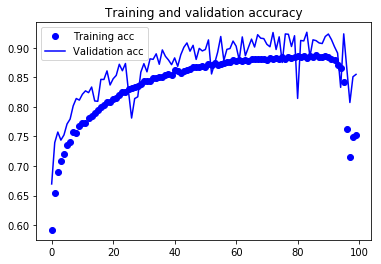

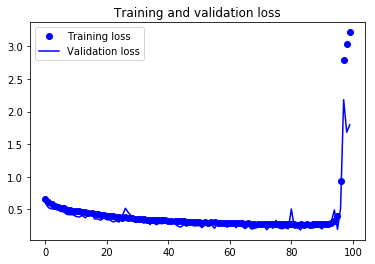

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
model.save_weights('cats_vs_dogs_weights.h5')

In [37]:
model.save('cats_vs_dogs_2.h5')

In [38]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 12500 images belonging to 1 classes.
test acc: 0.6139999991655349


In [50]:
import graphviz
graphviz.__version__

'0.8.3'

In [51]:
import pydot
pydot.__version__

'1.2.4'

In [69]:
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot


SVG(model_to_dot(model).create(prog='dot', format='svg'))

NameError: name 'plot' is not defined

In [70]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))



ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.